## Generating Synthetic data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Constants for data generation

np.random.seed(42)
num_cycles = 1000  # Number of charge-discharge cycles

In [3]:
#Initial conditions

initial_soh = 1.0  # 100% health at the start
min_soh = 0.7  # Minimum SoH for the simulation (70%)
soh_decay_rate = np.random.uniform(0.0001, 0.0005, num_cycles)  # Random decay rate per cycle
temperature_range = (20, 45)  # Temperature in °C (20°C to 45°C)
voltage_range = (300, 400)  # Voltage in volts (simulated battery pack)
current_range = (50, 200)  # Current in amperes (charging/discharging current)
soc_range = (0, 100)  # State of Charge in percentage
charge_time_range = (0.5, 2.0)  # Time in hours
discharge_time_range = (1.0, 4.0)  # Time in hours

In [4]:
# Initialize lists to store generated data
soh_list = []
soc_list = []
temperature_list = []
voltage_list = []
current_list = []
charge_time_list = []
discharge_time_list = []
cycle_list = []

In [5]:
# Generate synthetic data for each cycle
soh = initial_soh
for cycle in range(num_cycles):
    # Cycle number
    cycle_list.append(cycle + 1)
    
    # SoH decay
    if soh > min_soh:
        soh -= soh_decay_rate[cycle]
    else:
        soh = min_soh  # Cap the SoH at minimum value
    soh_list.append(soh)
    
    # Generate random data for other parameters for each cycle
    soc = np.random.uniform(*soc_range)
    temperature = np.random.uniform(*temperature_range)
    voltage = np.random.uniform(*voltage_range)
    current = np.random.uniform(*current_range)
    
    charge_time = np.random.uniform(*charge_time_range)
    discharge_time = np.random.uniform(*discharge_time_range)
    
    # Append to the respective lists
    soc_list.append(soc)
    temperature_list.append(temperature)
    voltage_list.append(voltage)
    current_list.append(current)
    charge_time_list.append(charge_time)
    discharge_time_list.append(discharge_time)

In [6]:
# Create a DataFrame from the generated data
data = {
    'Cycle Number': cycle_list,
    'State of Health (SoH)': soh_list,
    'State of Charge (SoC)': soc_list,
    'Temperature (°C)': temperature_list,
    'Voltage (V)': voltage_list,
    'Current (A)': current_list,
    'Charge Time (hrs)': charge_time_list,
    'Discharge Time (hrs)': discharge_time_list}
df = pd.DataFrame(data)

# Save the data to a CSV file
df.to_csv('synthetic_ev_battery_data.csv', index=False)

# Print the first few rows of the generated data
print(df.head())


   Cycle Number  State of Health (SoH)  State of Charge (SoC)  \
0             1               0.999750              18.513293   
1             2               0.999270              69.227656   
2             3               0.998877              94.405934   
3             4               0.998538              91.548830   
4             5               0.998375              94.426649   

   Temperature (°C)  Voltage (V)  Current (A)  Charge Time (hrs)  \
0         33.547524   387.294584   159.833733           1.709842   
1         41.229891   324.966801   123.413745           0.831814   
2         20.985670   370.557517   188.787248           0.770863   
3         20.848649   369.742027    94.602351           1.886594   
4         31.855355   386.204265   176.682410           0.978651   

   Discharge Time (hrs)  
0              2.976350  
1              3.963004  
2              2.703836  
3              3.913175  
4              3.486746  


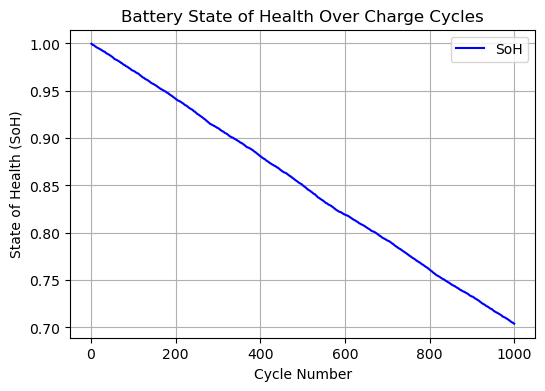

In [8]:
# Plot SoH over cycles
plt.figure(figsize=(6, 4))
plt.plot(df['Cycle Number'], df['State of Health (SoH)'], label='SoH', color='blue')
plt.title('Battery State of Health Over Charge Cycles')
plt.xlabel('Cycle Number')
plt.ylabel('State of Health (SoH)')
plt.grid(True)
plt.legend()
plt.show()

# Data Preprocessing

### Handling missing values

In [9]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Cycle Number             0
State of Health (SoH)    0
State of Charge (SoC)    0
Temperature (°C)         0
Voltage (V)              0
Current (A)              0
Charge Time (hrs)        0
Discharge Time (hrs)     0
dtype: int64


In [10]:
#dropping missing values
df = df.dropna()

In [11]:
#impute missing values
df['State of Health (SoH)'].fillna(df['State of Health (SoH)'].mean(), inplace=True)

### Outlier Detection

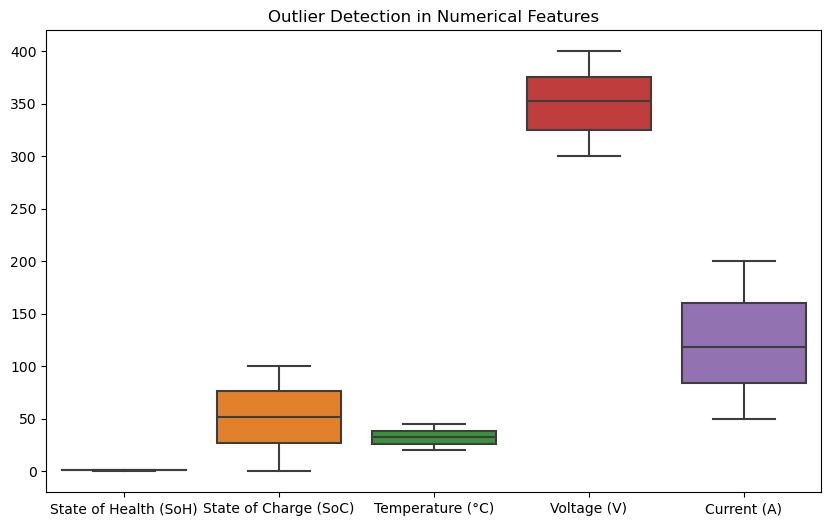

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']])
plt.title('Outlier Detection in Numerical Features')
plt.show()

In [16]:
from scipy import stats

# Remove rows with z-scores greater than 3
df = df[(np.abs(stats.zscore(df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']])) < 3).all(axis=1)]

### Feature Scaling

In [17]:
#Normalisation

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']] = scaler.fit_transform(df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']])

In [18]:
# Standardisation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']] = scaler.fit_transform(df[['State of Health (SoH)', 'State of Charge (SoC)', 'Temperature (°C)', 'Voltage (V)', 'Current (A)']])

### Encoding Categorical Variables

In [24]:
df = pd.get_dummies(df, columns=['Categorical_Column_Name'], drop_first=True)

In [23]:
print(df.columns)

Index(['Cycle Number', 'State of Health (SoH)', 'State of Charge (SoC)',
       'Temperature (°C)', 'Voltage (V)', 'Current (A)', 'Charge Time (hrs)',
       'Discharge Time (hrs)'],
      dtype='object')


In [21]:
### Spliting the Data

In [28]:
from sklearn.model_selection import train_test_split

# Assuming 'State of Health (SoH)' is the target variable, and the rest are features
X = df.drop(columns=['State of Health (SoH)'])
y = df['State of Health (SoH)']

# Splitting the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 7)
X_test shape: (200, 7)
y_train shape: (800,)
y_test shape: (200,)


In [27]:
print(X_train.columns)

Index(['Cycle Number', 'State of Charge (SoC)', 'Temperature (°C)',
       'Voltage (V)', 'Current (A)', 'Charge Time (hrs)',
       'Discharge Time (hrs)'],
      dtype='object')


### Data Preprocessing Pipeline Summary:
Check for missing data and handle it using imputation or removal.
Detect outliers using visualizations or statistical methods and remove them if necessary.
Scale features to ensure they are on the same scale for better model performance.
Encode categorical variables if present.
Split the data into training and testing sets for model evaluation.
This preprocessing will ensure your data is clean and ready for analysis or model building. Let me know when you want to proceed with the next steps, like model building or analysis!

## Building and training the model

In [ ]:
# Model Selection : We ll be using linear regression model in the beginning

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 0.00018278106289865354
R-squared (R2): 0.9998134440927774


### Other Models

### Random Forest Regressor

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest - Mean Squared Error (MSE):", rf_mse)
print("Random Forest - R-squared (R2):", rf_r2)

Random Forest - Mean Squared Error (MSE): 1.3506347034432957e-05
Random Forest - R-squared (R2): 0.9999862147162057


## Model Evaluation and Performance matrix

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-Squared (R²): {r2}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1.3506347034432957e-05
Root Mean Squared Error (RMSE): 0.0036750982346643413
Mean Absolute Error (MAE): 0.0028893502439375947
R-Squared (R²): 0.9999862147162057


### Hyperparameter tuning for random forest regressor

In [36]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_features': ['auto', 'sqrt'],  # Features to consider at each split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


### Evaluate the Tuned Random Forest Regressor

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.002640840128554074
Mean Squared Error (MSE): 1.0836470342524052e-05
Root Mean Squared Error (RMSE): 0.003291879454433903
R² Score: 0.9999889397319187


## Visualize Predictions vs. Actual Values

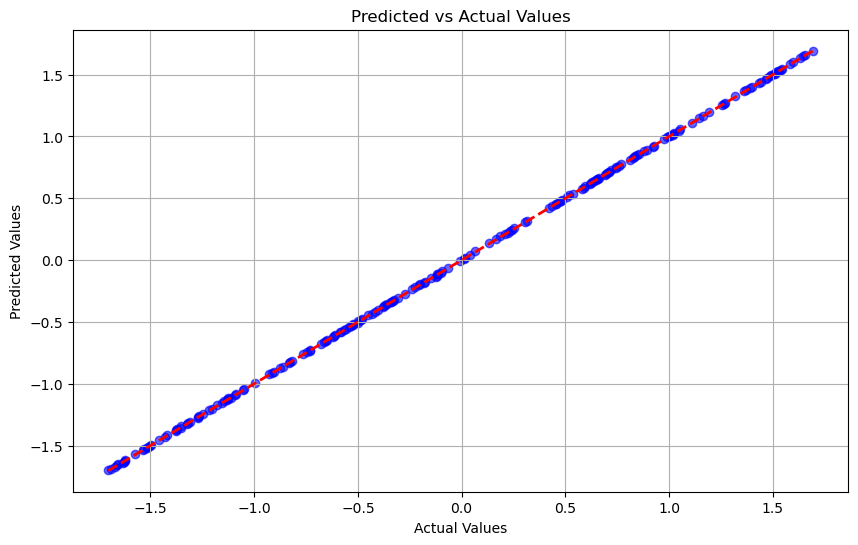

In [38]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--')  # Diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


## Additional Analysis

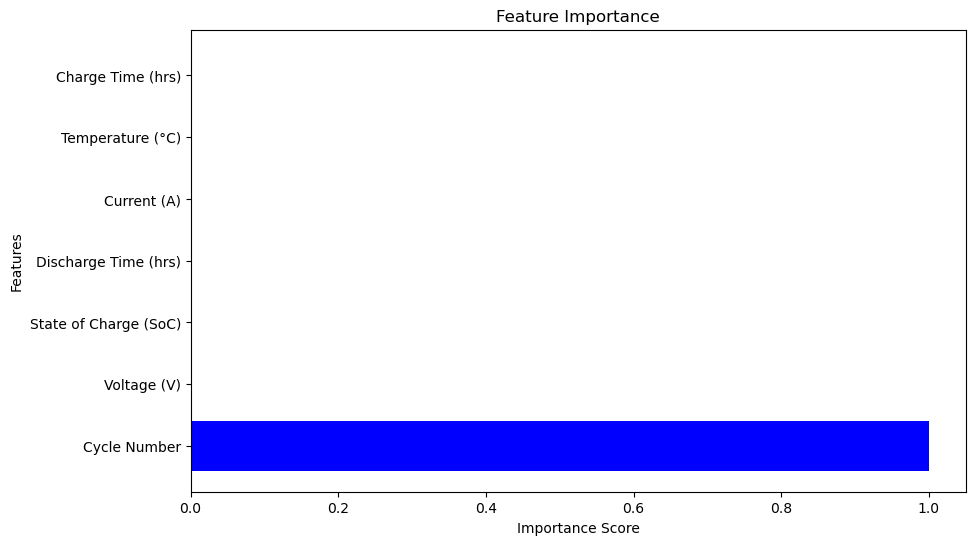

In [39]:
# Feature Importance Analysis
# Get feature importance from the best model
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='blue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


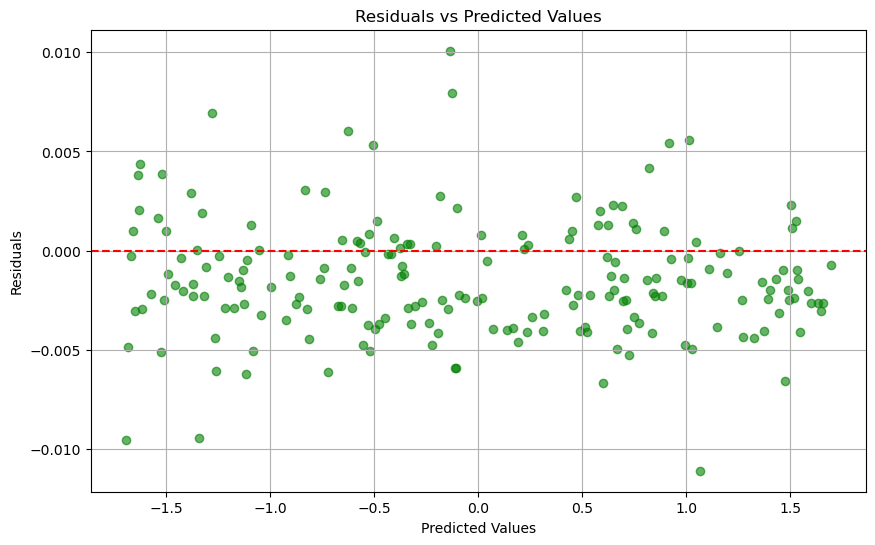

In [40]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = (-cv_scores)**0.5

# Print cross-validation results
print("Cross-Validated RMSE: ", cv_rmse.mean(), "±", cv_rmse.std())


Cross-Validated RMSE:  0.0045573686844924835 ± 0.0004993385519624931
